<a href="https://colab.research.google.com/github/21P31A1232/21P31A1232/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Title of Project : Wine Quality Prediction

Objective: Build classification models to predict the wine quality.

Data Source: YBI Foundation | Kaggle

Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model

Import Data

In [3]:
#Loading the Dataset to a pandas DataFrame
wine_data = pd.read_csv('/WineQT.csv')
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

Describe Data

In [4]:
#Number of rows And Columns in Dataset
wine_data.shape

(1143, 13)

Data Visualisation

In [5]:
#Dirst 5 rows of Dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
#Checking for missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Data Preprocessing

In [9]:
#Statastical measures of Dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


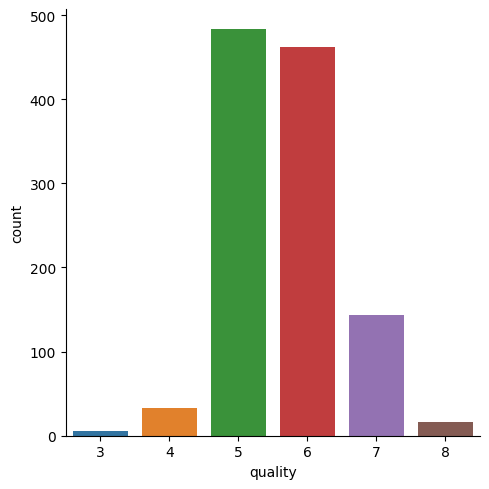

In [10]:
sns.catplot(x='quality', data=wine_data,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

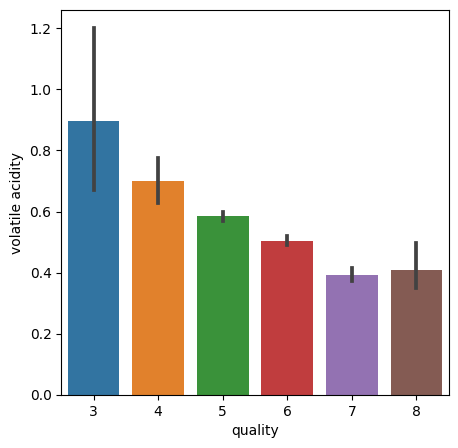

In [13]:
#voliate Acidity Vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'volatile acidity', data= wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

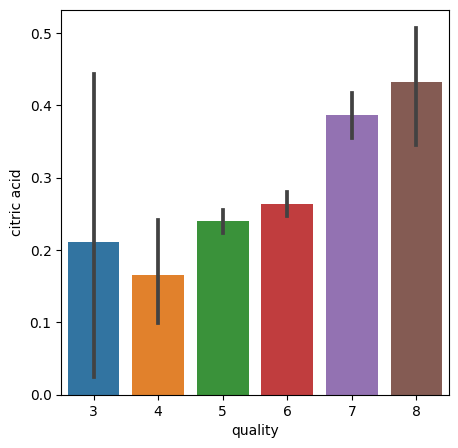

In [14]:
#Citric acid Vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'citric acid', data= wine_data)

Correlation:
 -> Positive Correlation
 -> Negative Correlation

In [15]:
correlation = wine_data.corr()

<Axes: >

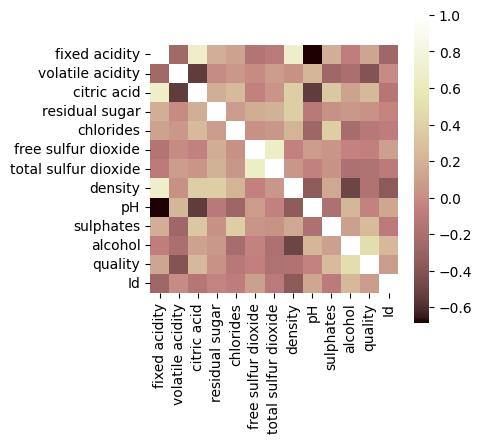

In [24]:
#Constructing a heatmap to understand correlation between the columns
plt.figure(figsize=(4,4))
sns.heatmap(correlation,cbar= True, square= True, fmt= '.1f', annot_kws={'size=8'}, cmap= 'pink')

Define Target Variable (y) and Feature Variables (X)

In [30]:
#Separate Data and Label
x=wine_data.drop('quality', axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

Label Binarization

In [27]:
y= wine_data['quality'].apply(lambda y_value: 1 if y_value>7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Train Test Split

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=2)

In [33]:
print(y.shape, y_train.shape, y_test.shape)

(1143,) (914,) (229,)


Modeling:
 Random  Forest Classifier

In [34]:
model= RandomForestClassifier()

In [36]:
model.fit(x_train, y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [37]:
#Accuracy on test data
x_test_prediction= model.predict(x_test)
test_data_accuracy= accuracy_score(x_test_prediction, y_test) 

In [38]:
print('Accuracy:', test_data_accuracy)

Accuracy: 0.9737991266375546


Prediction

In [43]:
input_data= (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7)

#Changing the data into numpy array
input_data_as_numpy_array= np.asarray(input_data)

#Reshape the data as we predicting the data for only one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction= model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
   print('Bad Quality Wine')





[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explaination

It describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.